In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass
password = getpass.getpass()

········


In [7]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

In [30]:
data = pd.read_sql_query('''SELECT * 
FROM (SELECT sp.amount, sr.customer_id, sr.staff_id,sr.rental_id, si.store_id, sf.language_id, sf.rental_duration, sf.length, sf.replacement_cost, num_film_rent
FROM sakila.rental sr
LEFT JOIN sakila.payment sp
USING (customer_id)
JOIN sakila.inventory si
USING (inventory_id)
JOIN (SELECT inventory_id, COUNT(rental_id) num_film_rent
FROM rental
JOIN sakila.inventory si
USING (inventory_id)
JOIN sakila.film sf
USING (film_id)
GROUP BY inventory_id)sub1
USING(inventory_id)
JOIN sakila.film sf
USING (film_id)
WHERE rental_date BETWEEN '2005-01-01' AND '2005-12-31') sub2
LEFT JOIN (SELECT rental_id,
CASE 
WHEN rental_date BETWEEN '2005-08-01' AND '2005-08-31' THEN 'True'
ELSE 'False'
END AS  Renter_in_agust
FROM rental)sub3
USING (rental_id);''', engine)
data

,rental_id,amount,customer_id,staff_id,store_id,language_id,rental_duration,length,replacement_cost,num_film_rent,Renter_in_agust
0,4863,2.99,431,2,1,1,6,86,20.99,3,False
1,4863,2.99,431,2,1,1,6,86,20.99,3,False
2,4863,4.99,431,2,1,1,6,86,20.99,3,False
3,4863,3.99,431,2,1,1,6,86,20.99,3,False
4,4863,4.99,431,2,1,1,6,86,20.99,3,False
...,...,...,...,...,...,...,...,...,...,...,...
440397,12894,4.99,541,2,2,1,3,50,18.99,5,True
440398,12894,3.99,541,2,2,1,3,50,18.99,5,True
440399,12894,1.99,541,2,2,1,3,50,18.99,5,True
440400,12894,0.99,541,2,2,1,3,50,18.99,5,True


In [31]:
data.shape

(440402, 11)

In [39]:
data = data.drop_duplicates(subset=['rental_id'])
data.sort_values(by=['rental_id'])

,rental_id,amount,customer_id,staff_id,store_id,language_id,rental_duration,length,replacement_cost,num_film_rent,Renter_in_agust
35045,1,2.99,130,1,1,1,7,148,21.99,5,False
146356,2,2.99,459,1,2,1,7,126,16.99,5,False
163795,3,3.99,408,1,2,1,7,156,14.99,5,False
235383,4,4.99,333,2,1,1,6,181,21.99,5,False
200027,5,6.99,222,1,2,1,5,84,29.99,5,False
...,...,...,...,...,...,...,...,...,...,...,...
74102,16045,0.99,14,1,1,1,5,67,23.99,2,True
418606,16046,6.99,74,2,2,1,6,78,28.99,5,True
201042,16047,4.99,114,2,2,1,4,122,15.99,2,True
194114,16048,7.99,103,1,1,1,4,151,28.99,2,True


In [40]:
data.shape

(15862, 11)

In [41]:
data['Renter_in_agust'].value_counts()

False    10176
True      5686
Name: Renter_in_agust, dtype: int64

In [42]:
data.describe()

,rental_id,amount,customer_id,staff_id,store_id,language_id,rental_duration,length,replacement_cost,num_film_rent
count,15862.000000,15862.000000,15862.000000,15862.000000,15862.000000,15862.0,15862.000000,15862.000000,15862.000000,15862.000000
mean,7960.041546,4.168351,297.275753,1.498487,1.506304,1.0,4.937208,114.992750,20.224775,3.863447
std,4616.575055,2.314752,172.381925,0.500013,0.499976,0.0,1.401618,40.114111,6.083595,1.053282
min,1.000000,0.990000,1.000000,1.000000,1.000000,1.0,3.000000,46.000000,9.990000,1.000000
25%,3968.250000,2.990000,148.000000,1.000000,1.000000,1.0,4.000000,81.000000,14.990000,3.000000
50%,7934.500000,3.990000,296.000000,1.000000,2.000000,1.0,5.000000,114.000000,20.990000,4.000000
75%,11920.750000,4.990000,446.000000,2.000000,2.000000,1.0,6.000000,148.000000,25.990000,5.000000
max,16049.000000,11.990000,599.000000,2.000000,2.000000,1.0,7.000000,185.000000,29.990000,5.000000


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

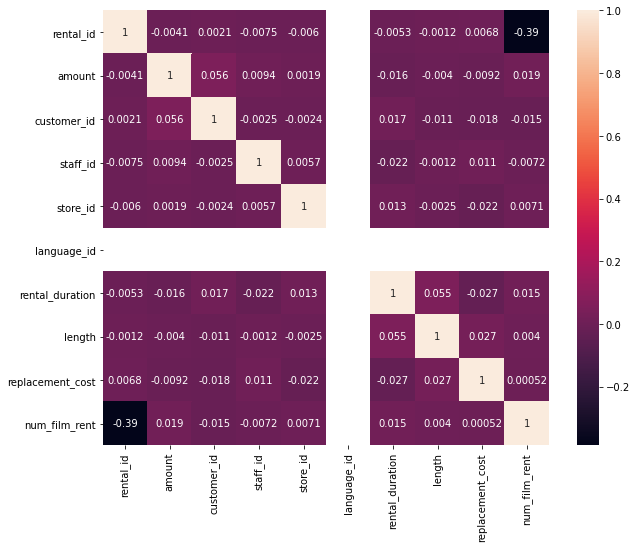

In [46]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [48]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [50]:
data.dtypes

rental_id             int64
amount              float64
customer_id           int64
staff_id              int64
store_id              int64
language_id           int64
rental_duration       int64
length                int64
replacement_cost    float64
num_film_rent         int64
Renter_in_agust      object
dtype: object

In [57]:
X = data.drop(['Renter_in_agust'],axis=1)

In [58]:
transformer = MinMaxScaler().fit(X)
x_normalized = transformer.transform(X)
x = pd.DataFrame(x_normalized)

In [62]:
y = data['Renter_in_agust']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train, y_train)

/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [68]:
predictions = classification.predict(X_test)
classification.score(X_test, y_test)

0.8693002731666316